<a href="https://colab.research.google.com/github/Shalu31/Titanic-ML-Basics/blob/main/diabete(KNN)_naive_bais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
236,7,181,84,21,192,35.9,0.586,51,1


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


/tmp/ipython-input-10-4168807564.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Outcome'],data=df,palette= ['red','blue'])


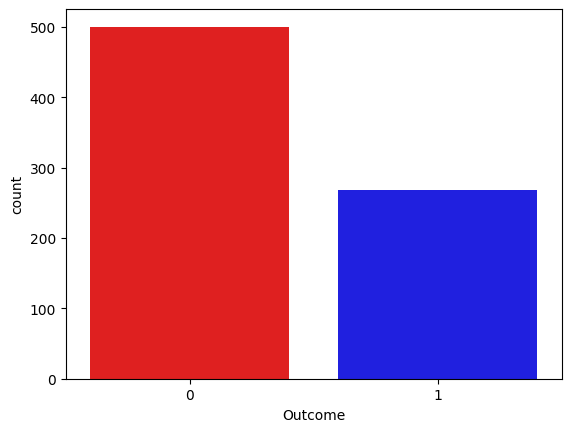

In [ ]:
sns.countplot(x=df['Outcome'],data=df,palette= ['red','blue'])
plt.show()

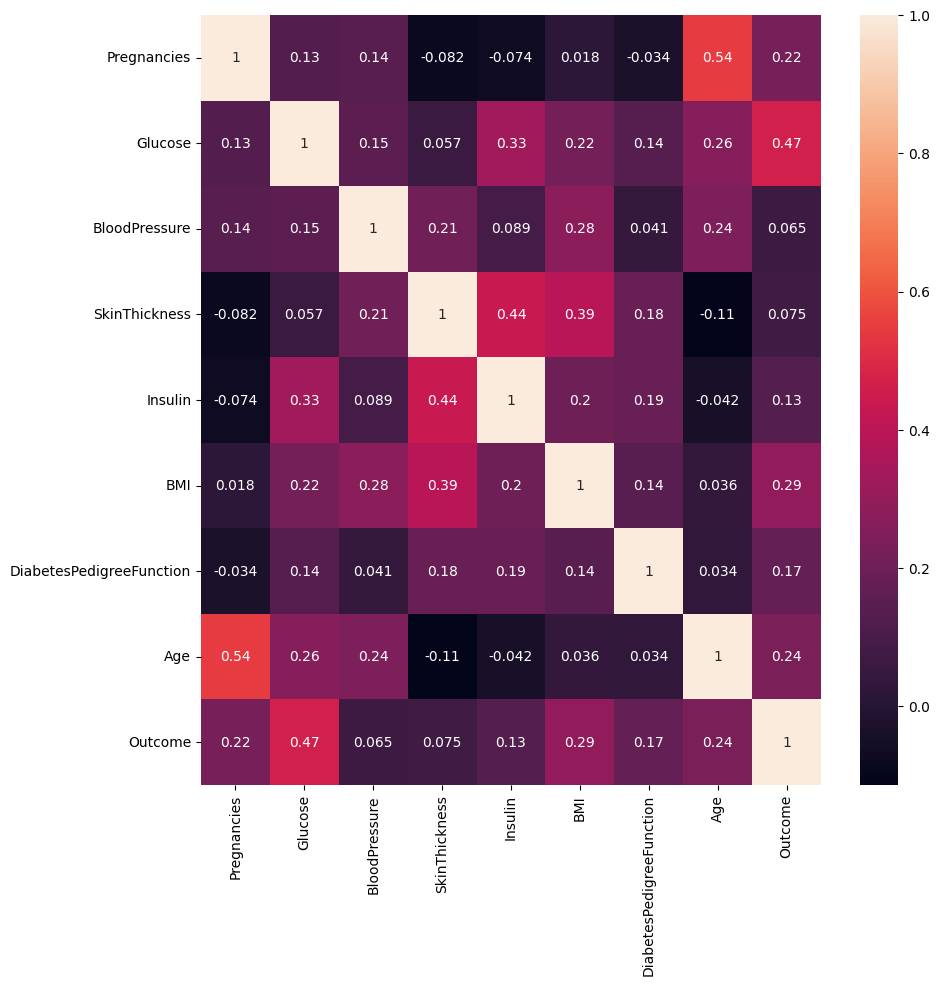

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

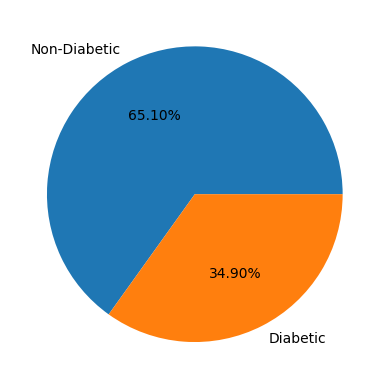

In [ ]:
plt.pie(df['Outcome'].value_counts(),labels=['Non-Diabetic','Diabetic'],autopct='%1.2f%%')
plt.show()

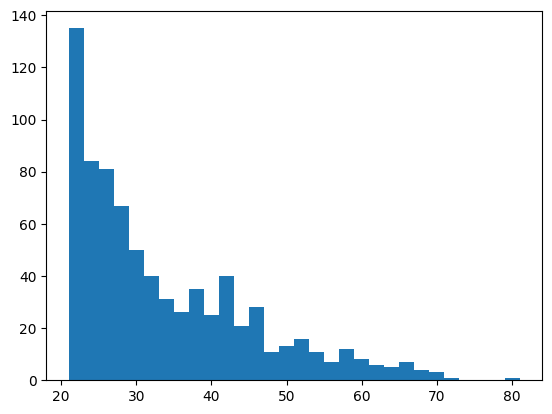

In [ ]:
plt.hist(df['Age'],bins=30)
plt.show()

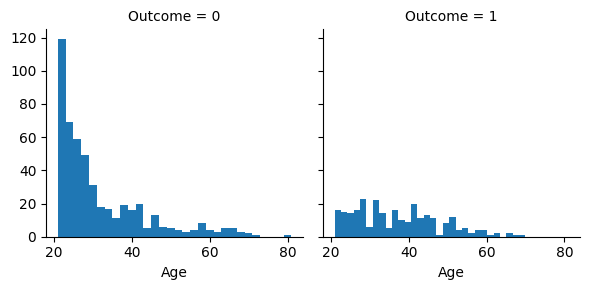

In [ ]:
g = sns.FacetGrid(df,col='Outcome')
g.map(plt.hist,'Age',bins=30)
plt.show()

In [ ]:
g = df.groupby('Outcome')
g.max()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,13,197,122,60,744,57.3,2.329,81
1,17,199,114,99,846,67.1,2.420,70


In [ ]:
df1 = df.drop(columns = ['Pregnancies','Outcome'])
df2 = df[['Outcome','Pregnancies']]

In [ ]:
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [ ]:
df2

,Outcome,Pregnancies
0,1,6
1,0,1
2,1,8
3,0,1
4,1,0
...,...,...
763,0,10
764,0,2
765,0,5
766,1,1


In [ ]:
df1.sample(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
439,107,88,0,0,36.8,0.727,31
221,158,90,0,0,31.6,0.805,66
550,116,70,28,0,27.4,0.204,21
766,126,60,0,0,30.1,0.349,47
433,139,75,0,0,25.6,0.167,29


In [ ]:
import numpy as np
df1.replace(0,np.nan,inplace = True)
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,NaN,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,NaN,30.1,0.349,47


In [ ]:
df1.isnull().sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0


In [ ]:
df1.fillna(df1.mean(),inplace = True)
df1.sample(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
671,99.0,58.0,10.00000,155.548223,25.4,0.551,21
409,172.0,68.0,49.00000,579.000000,42.4,0.702,28
489,194.0,80.0,29.15342,155.548223,26.1,0.551,67
376,98.0,82.0,15.00000,84.000000,25.2,0.299,22
345,126.0,88.0,36.00000,108.000000,38.5,0.349,49


In [ ]:
final = pd.concat([df1,df2],axis=1)

In [ ]:
final.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,6
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,1
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,8
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,1
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,0


In [ ]:
final.isnull().sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
Pregnancies,0


In [ ]:
X = final.drop(columns = ['Outcome'])
Y = final['Outcome']

In [ ]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,6
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,1
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32,8
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21,1
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63,10
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27,2
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30,5
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K =KNeighborsClassifier(n_neighbors=5)
K.fit(X_train,Y_train)
Y_pred_knn = K.predict(X_test)
Y_pred_knn



array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(Y_test,Y_pred_knn)
acc_knn


0.7272727272727273

In [ ]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Y_test,Y_pred_knn)
cm_knn

array([[88, 21],
       [21, 24]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.22377622, 0.51020408, 0.13043478, ..., 0.0670813 , 0.01960784,
        0.11764706],
       [0.51048951, 0.6122449 , 0.24079804, ..., 0.09151488, 0.11764706,
        0.11764706],
       [0.32167832, 0.55102041, 0.35869565, ..., 0.07107952, 0.05882353,
        0.        ],
       ...,
       [0.53146853, 0.55102041, 0.24079804, ..., 0.13993781, 0.        ,
        0.        ],
       [0.56643357, 0.85714286, 0.24079804, ..., 0.0661928 , 0.31372549,
        0.29411765],
       [0.11888112, 0.26530612, 0.0326087 , ..., 0.07552199, 0.        ,
        0.05882353]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K = KNeighborsClassifier(n_neighbors = 5)
K.fit(X_train_scaled,Y_train)
Y_pred_knn = K.predict(X_test_scaled)
Y_pred_knn

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
Y_test.values

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(Y_test,Y_pred_knn)
acc_knn

0.7402597402597403

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)
Y_pred_nb

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc_nb = accuracy_score(Y_test,Y_pred_nb)
acc_nb

0.7402597402597403

In [ ]:
text = ['Learning Python is fun!','I recently completed a basic machine learning project using the Titanic dataset','I explored data cleaning techniques like handling missing values','I used Matplotlib and Seaborn to create plots that show survival trends'
]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)

In [ ]:
vectorizer.get_feature_names_out()

array(['and', 'basic', 'cleaning', 'completed', 'create', 'data',
       'dataset', 'explored', 'fun', 'handling', 'is', 'learning', 'like',
       'machine', 'matplotlib', 'missing', 'plots', 'project', 'python',
       'recently', 'seaborn', 'show', 'survival', 'techniques', 'that',
       'the', 'titanic', 'to', 'trends', 'used', 'using', 'values'],
      dtype=object)

In [ ]:
vectorizer.vocabulary_

{'learning': 11,
 'python': 18,
 'is': 10,
 'fun': 8,
 'recently': 19,
 'completed': 3,
 'basic': 1,
 'machine': 13,
 'project': 17,
 'using': 30,
 'the': 25,
 'titanic': 26,
 'dataset': 6,
 'explored': 7,
 'data': 5,
 'cleaning': 2,
 'techniques': 23,
 'like': 12,
 'handling': 9,
 'missing': 15,
 'values': 31,
 'used': 29,
 'matplotlib': 14,
 'and': 0,
 'seaborn': 20,
 'to': 27,
 'create': 4,
 'plots': 16,
 'that': 24,
 'show': 21,
 'survival': 22,
 'trends': 28}

In [ ]:
data = vectorizer.transform(text).toarray()
data

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 0]])

In [ ]:
import pandas as pd
df = pd.DataFrame(data,columns=vectorizer.get_feature_names_out())
df

,and,basic,cleaning,completed,create,data,dataset,explored,fun,handling,...,survival,techniques,that,the,titanic,to,trends,used,using,values
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,0,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,0
